# Matplotlib Workshop

In [1]:
# libraries related to matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

# Other libraries
import numpy as np
import pandas as pd
import random
from shapely.geometry import Point

## Contents

### Part I: Introduction - What is `matplotlib`?
- 1.1 Introduction
- 1.2 Objects/Data structures of `matplotlib`
- 1.3 Elements in a graph
- 1.4 Attributes of lines

### Part II: Basic Usage - Histogram, Bars, Scatter, Pie charts, Lines, etc.
- Basic functions
- 2.1 `plot()`
- 2.2 `scatter()`
- 2.3 `hist()`
- 2.4 `bar()`/`barh()`
- 2.5 `pie()`/doughNut chart
- 2.6 `boxplot()`
- 2.7 `violinplot()`
- Seaborn functions
- 2.8 `lineplot()`
- 2.9 `scatterplot()`
- 2.10 `matrixplot()`
- 2.11 `distplot()`
- 2.12 `jointplot()`
- 2.13 `boxplot()`

### Part III: Data on Maps - Geospatial data visualization
- 3.1 `GeoPandas`
- 3.2 Discrete geodata

# Part I: Introduction - What is `matplotlib`?

### 1.1 Introduction

- Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
- https://matplotlib.org/index.html

### 1.2 Objects/Data structures of `matplotlib`

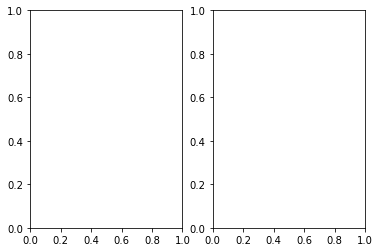

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2)

In [3]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)
ax1.plot(x, y, label="First")

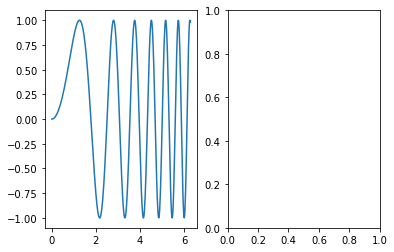

In [4]:
fig

### 1.3 Elements in a graph

In [5]:
# title
fig.suptitle("Title for all")
ax1.set_title("Test - ax1")

# axises
ax1.set_xlim(0, 6)
ax1.set_ylim(-1, 1)

# sizes
fig.set_figheight(5)
fig.set_figwidth(10)

# label
ax1.set_xlabel("x")
ax1.set_ylabel("y")

Text(3.200000000000003, 0.5, 'y')

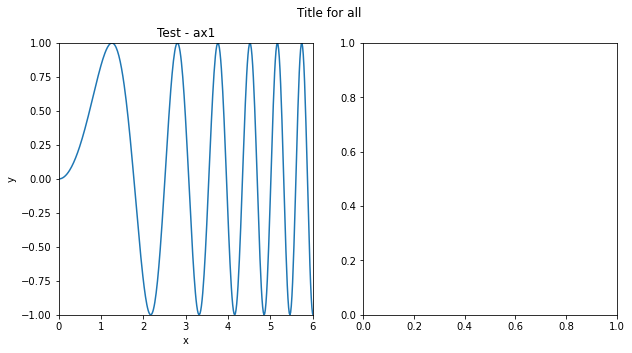

In [6]:
fig

### 1.4 Attributes of lines

In [7]:
def randomColor():
    color = "#%06x" % random.randint(0, 0xFFFFFF)
    return color

In [8]:
x = np.linspace(0, 10, 50)
y = np.sin(x)
line, = ax1.plot(
    x, 
    y, 
    label="second",
    color='green',
    marker='o',
    linestyle='solid',
    linewidth=1,
    markersize=1)

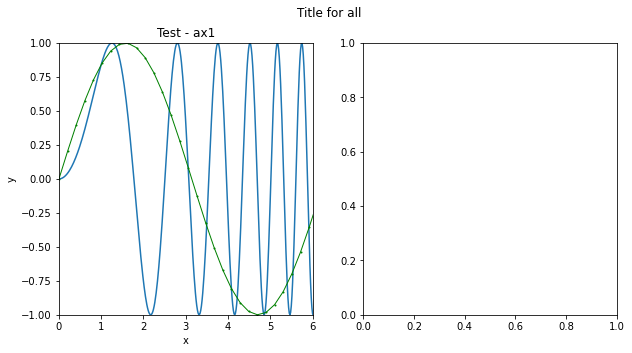

In [9]:
fig

In [10]:
line.set_dashes([2, 2, 10, 2])

In [11]:
ax1.legend()

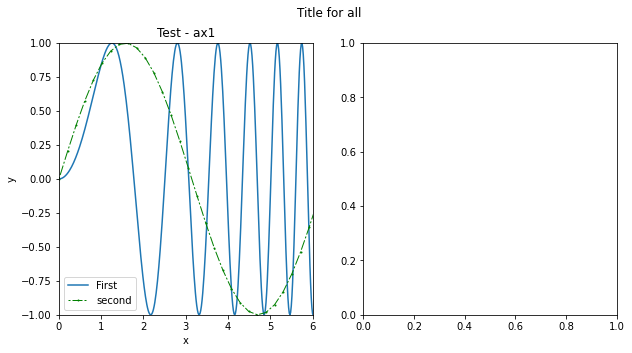

In [12]:
fig

In [13]:
# Use matplotlib to work between different functions
def layer(fig, ax):
    if (fig == None or ax == None):
        fig, ax = plt.subplots()
    x = np.linspace(0, 10, 500)
    y = np.sin(x)    
    ax.plot(x, y)
    return fig, ax

In [14]:
layer(fig, ax2)

(<Figure size 720x360 with 2 Axes>, <AxesSubplot:>)

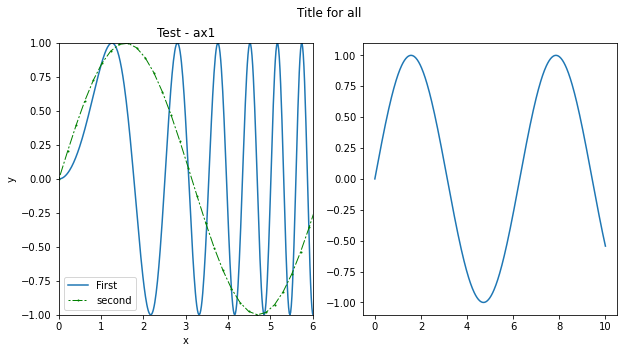

In [15]:
fig

# Part II: Basic Usage - Histogram, Bars, Scatter, Pie charts, Lines, etc.

# `matplotlib` functions
- Use simple datastructures, e.g., lists, dictionaries as inputs
- https://matplotlib.org/index.html

### 2.1 `plot()`

(See examples above)

### 2.2 `scatter()`

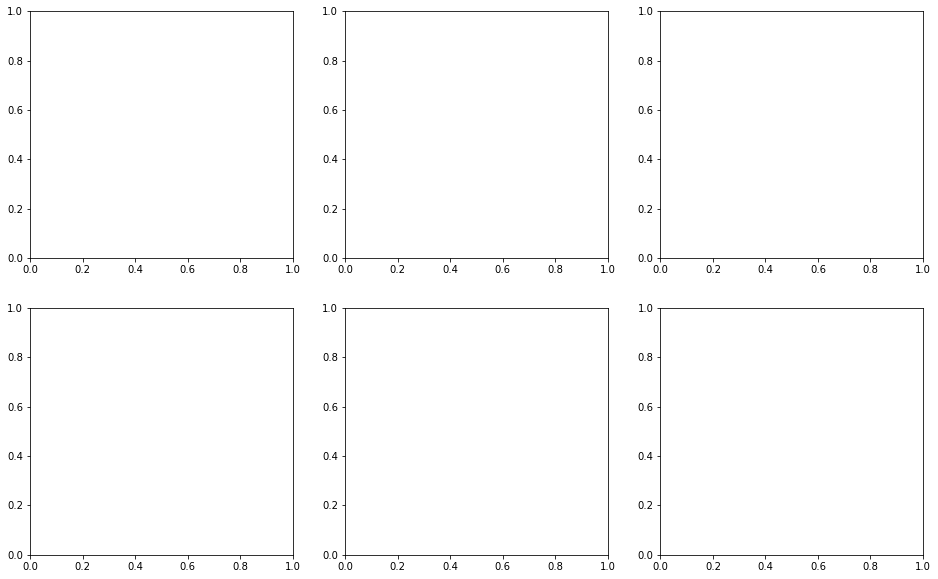

In [16]:
fig, axs = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(16)

In [17]:
x = [i for i in range(10)]
y1 = []
y2 = []
for i in range(10):
    y1.append(random.uniform(-5, 10))
    y2.append(random.uniform(-5, 10))

In [18]:
axs[0, 0].clear()
axs[0, 0].set_title("Scatter")
axs[0, 0].scatter(x, y1, marker="*", c='g')
axs[0, 0].scatter(x, y2, marker="o", c='r')

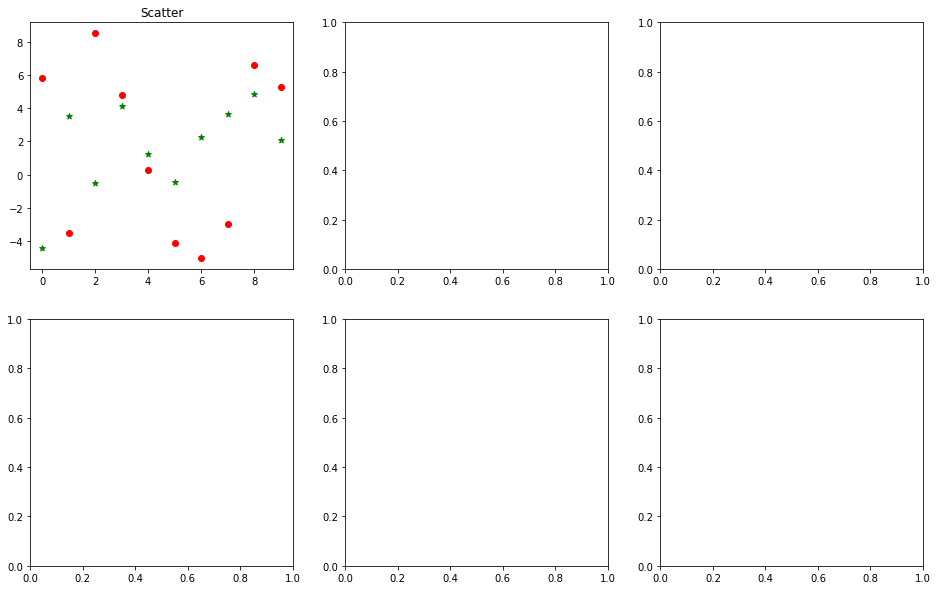

In [19]:
fig

### 2.3 `hist()`

In [20]:
x = []
for i in range(100):
    x.append(random.uniform(0, 10))
axs[0, 1].clear()
axs[0, 1].set_title('Histogram')
axs[0, 1].hist(x)

(array([10., 13.,  8.,  7., 14., 14.,  6.,  4., 10., 14.]),
 array([0.05071207, 1.03463288, 2.01855368, 3.00247449, 3.98639529,
        4.9703161 , 5.9542369 , 6.93815771, 7.92207851, 8.90599932,
        9.88992012]),
 <BarContainer object of 10 artists>)

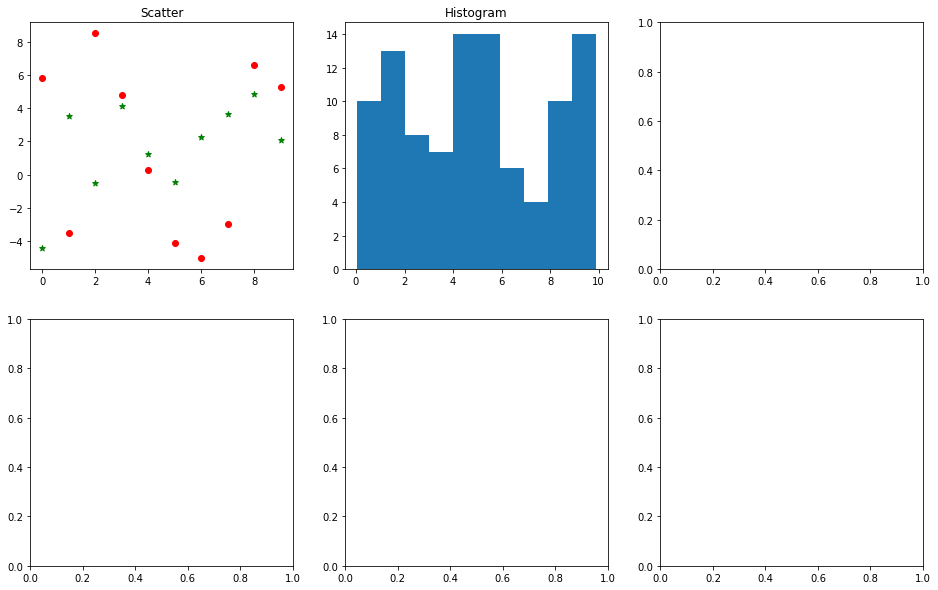

In [21]:
fig

### 2.4 `bar()`/`barh()`

In [22]:
dictionary = {'a': 100, 'b': 200, 'c': 150}
names = list(dictionary.keys())
values = list(dictionary.values())
axs[0, 2].clear()
axs[0, 2].set_title("Bar")
axs[0, 2].barh(names, values)

<BarContainer object of 3 artists>

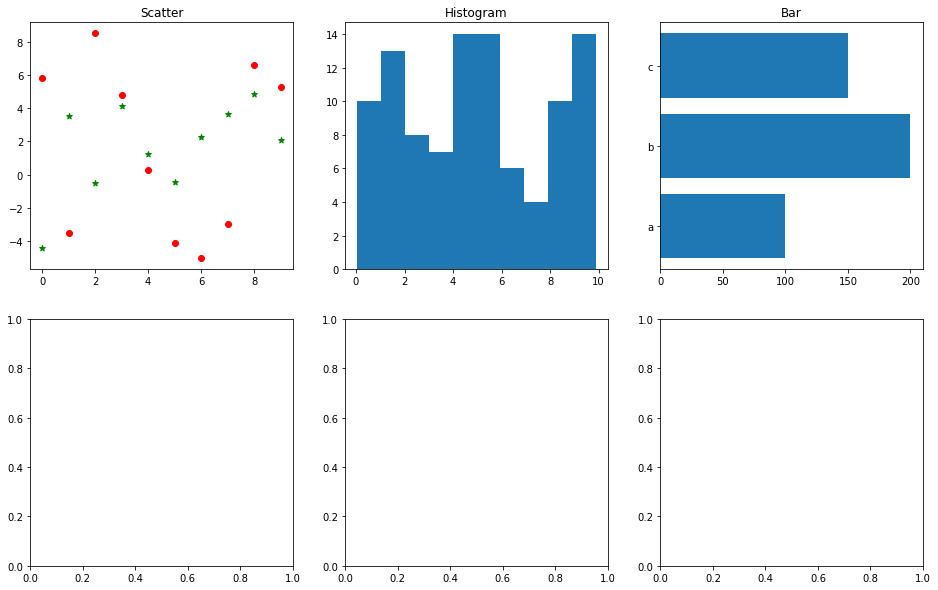

In [23]:
fig

### 2.5 `pie()`/doughNut chart

In [24]:
cats = ['a', 'b', 'c']
num = [100, 200, 140]
axs[1, 0].clear()
axs[1, 0].set_title("Pie")
axs[1, 0].pie(num, labels=cats, colors=['r', 'y', 'g'], radius=1, autopct="%0.1f%%")
# axs[1, 0].pie([1], labels=[""], colors=['w'], radius=0.5)

([<matplotlib.patches.Wedge at 0x18730bf15b0>,
 [Text(0.8313245164615624, 0.7203468250294088, 'a'),
  Text(-1.055442297353649, 0.30990572269135613, 'b'),
  Text(0.5947050015941456, -0.9253788203103135, 'c')],
 [Text(0.4534497362517612, 0.39291645001604114, '22.7%'),
  Text(-0.5756957985565357, 0.16903948510437605, '45.5%'),
  Text(0.32438454632407937, -0.5047520838056254, '31.8%')])

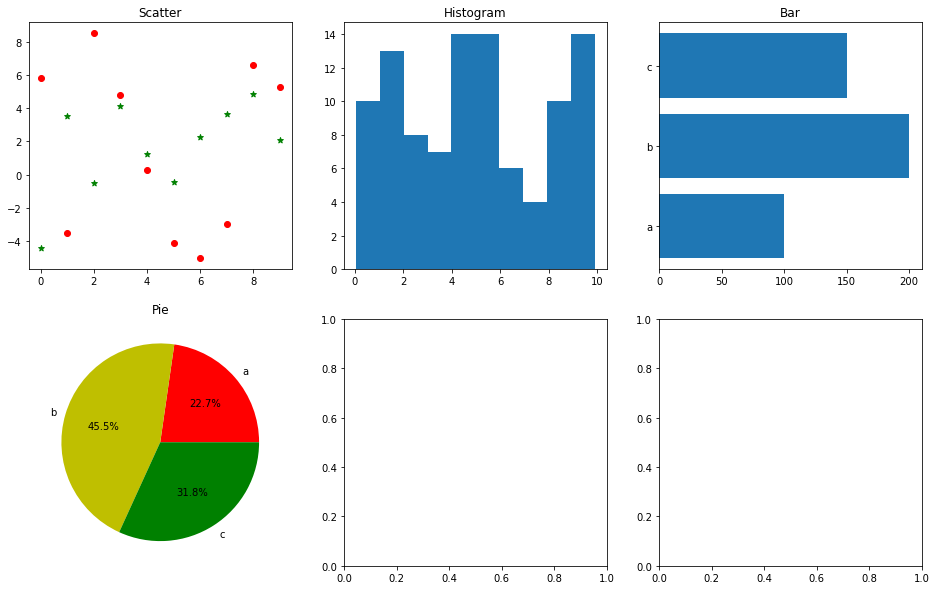

In [25]:
fig

### 2.6 `boxplot()`

In [26]:
l1 = []
l2 = []
l3 = []
for i in range(500):
    l1.append(random.triangular(0, 100))
    l2.append(random.triangular(0, 50))
    l3.append(random.triangular(50, 150))
l = [l1, l2, l3]
axs[1, 1].clear()
axs[1, 1].set_title("Box")
axs[1, 1].boxplot(l)

{'whiskers': [<matplotlib.lines.Line2D at 0x18730c27c40>,
 'caps': [<matplotlib.lines.Line2D at 0x18730c3c820>,
 'boxes': [<matplotlib.lines.Line2D at 0x18730c271f0>,
 'medians': [<matplotlib.lines.Line2D at 0x18730c4a220>,
 'fliers': [<matplotlib.lines.Line2D at 0x18730cde400>,
 'means': []}

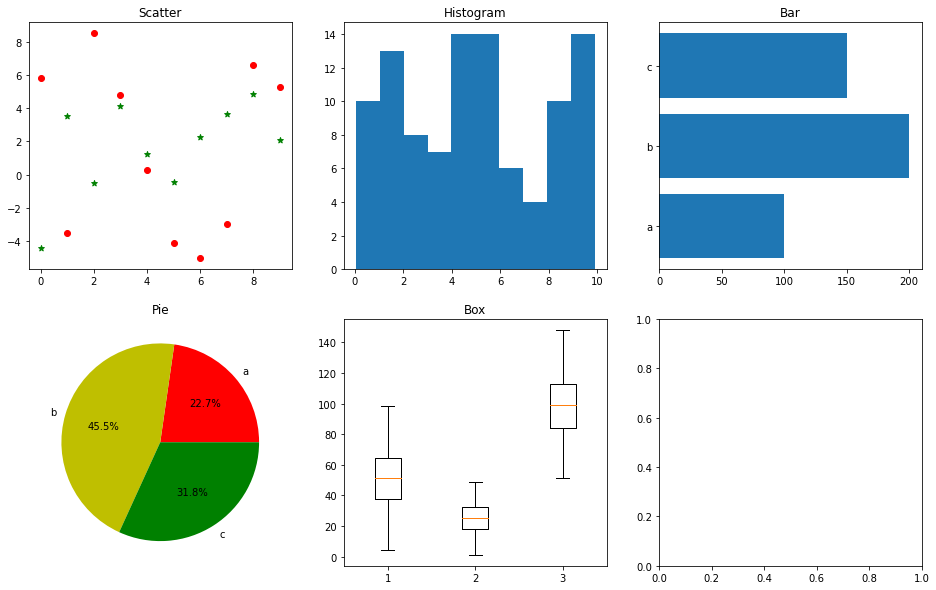

In [27]:
fig

### 2.7 `violinplot()`

In [28]:
axs[1, 2].clear()
axs[1, 2].set_title("Violine")
axs[1, 2].violinplot(l)

{'bodies': [<matplotlib.collections.PolyCollection at 0x18730c6b520>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x187310199a0>,
 'cmins': <matplotlib.collections.LineCollection at 0x18730c587c0>,
 'cbars': <matplotlib.collections.LineCollection at 0x18730af4b20>}

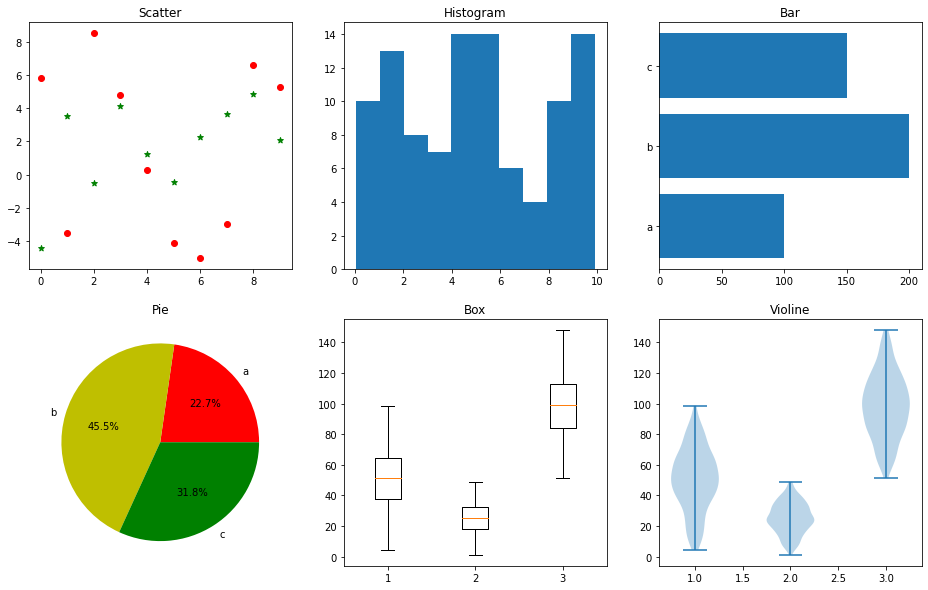

In [29]:
fig

## `SeaBorn` basic functions
- Use `pandas` dataframe as inputs
- https://seaborn.pydata.org/index.html

### 2.8 `lineplot()`

In [30]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [31]:
type(fmri)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

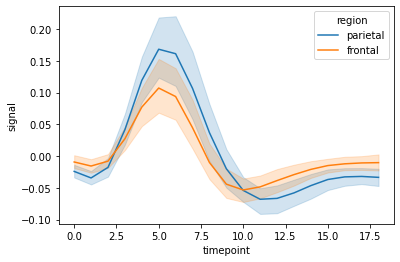

In [32]:
sns.lineplot(x='timepoint', y='signal', data=fmri, hue="region", markers=True)

### 2.9 `scatterplot()`

In [33]:
penguins = sns.load_dataset("penguins")

In [34]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

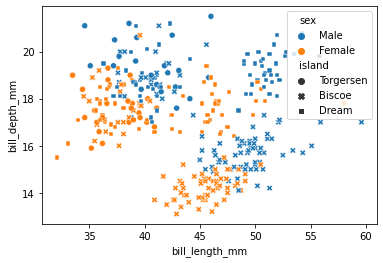

In [35]:
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", data=penguins, hue="sex", style="island")

### 2.10 `pairplot()`

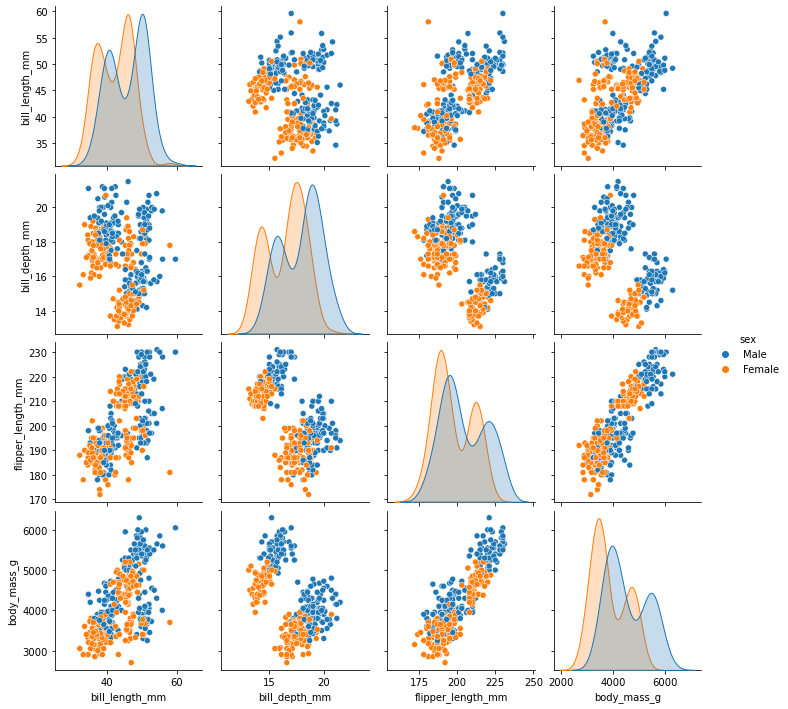

In [36]:
sns.pairplot(penguins, hue="sex")

### 2.11 `distplot()`

C:\Users\isaac\anaconda3\envs\geoPandasDemo\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='body_mass_g', ylabel='Density'>

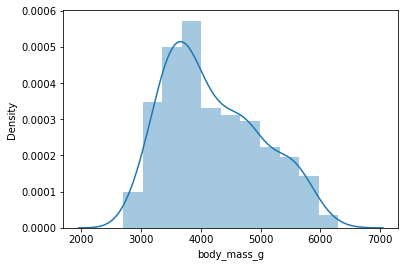

In [37]:
sns.distplot(penguins['body_mass_g'])

### 2.12 `jointplot()`

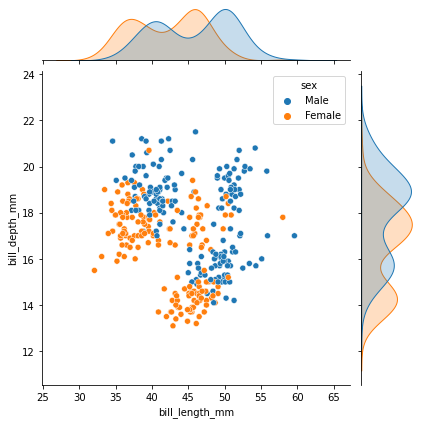

In [38]:
sns.jointplot(x="bill_length_mm", y="bill_depth_mm", data=penguins, kind="scatter", hue="sex")

### 2.13 `boxplot()`

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

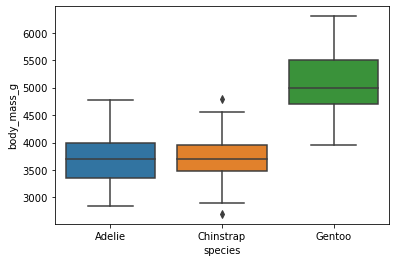

In [39]:
sns.boxplot(x="species", y="body_mass_g", data=penguins)

# Part III: Date on Maps - Geospatial data visualization

### 3.1 `GeoPandas`

- Installation 
    - Time consuming + hard to deal with dependencies -> Worth it
    - https://geopandas.org/install.html
    - Recommend creating a new environment

- Data structure
    - `GeoSeries` and `GeoDataframe`

In [40]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [41]:
# world.set_crs("EPSG:3395", allow_override=True)
world.set_crs(epsg=4326, allow_override=True)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [42]:
type(world)

geopandas.geodataframe.GeoDataFrame

In [43]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

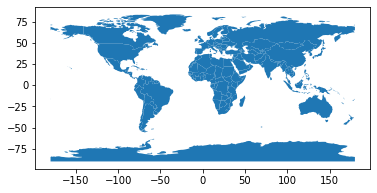

In [44]:
world.plot()

In [45]:
usa = world.loc[world["name"]=="United States of America"]
usa

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

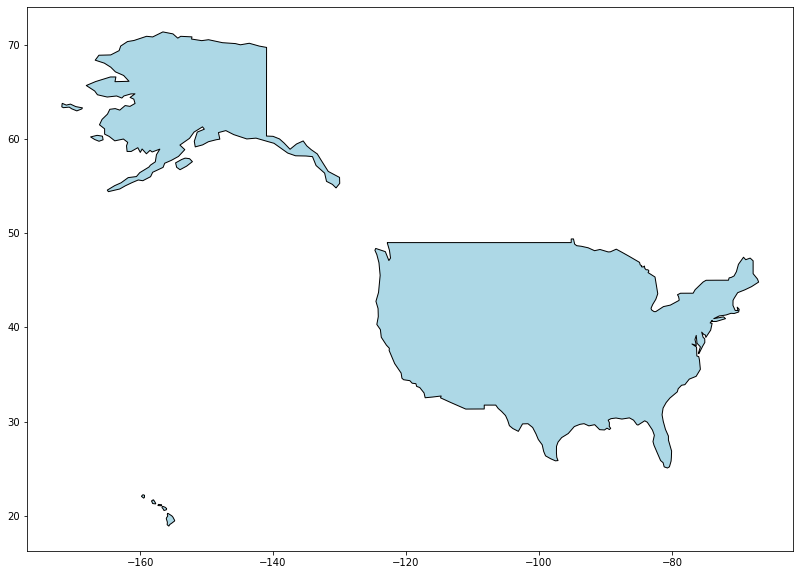

In [46]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)
usa.plot(ax=ax, color='lightblue', edgecolor='black')

In [47]:
locs = pd.DataFrame({
    'locs': ["A", "B", "C"], 
    'lat': [36.659164, 40.56344, 42.66234], 
    'lng': [-78.955953, -73.942623, -84.00234],
    'size': [1, 5, 9]})
locs

,locs,lat,lng,size
0,A,36.659164,-78.955953,1
1,B,40.563440,-73.942623,5
2,C,42.662340,-84.002340,9


In [48]:
geoLocs = geopandas.GeoDataFrame(locs, geometry = geopandas.points_from_xy(locs.lng, locs.lat))
geoLocs

,locs,lat,lng,size,geometry
0,A,36.659164,-78.955953,1,POINT (-78.95595 36.65916)
1,B,40.563440,-73.942623,5,POINT (-73.94262 40.56344)
2,C,42.662340,-84.002340,9,POINT (-84.00234 42.66234)


In [49]:
geoLocs.plot(ax=ax, color='red', marker='o', markersize=50 * geoLocs['size'])
plt.show()

<Figure size 432x288 with 0 Axes>

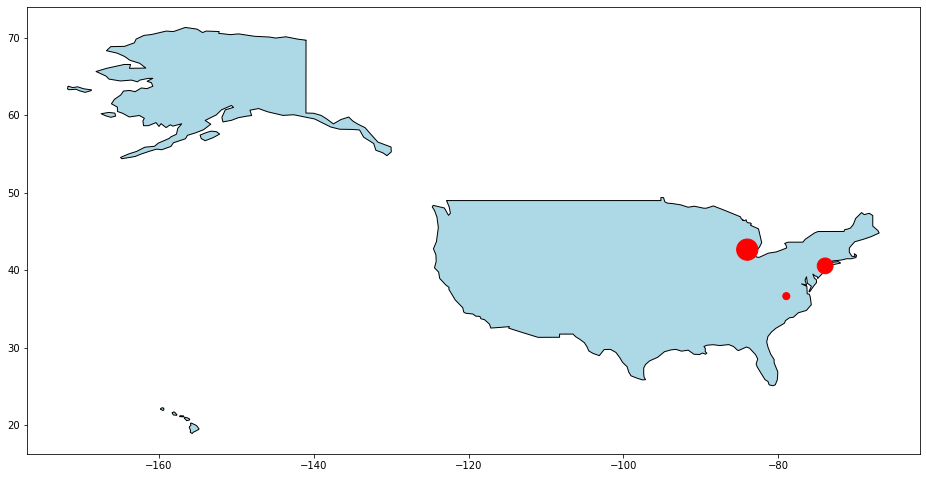

In [50]:
fig